In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
plt.style.use('ggplot')

In [88]:
dict_dayweek = {0: "Segunda",
                1: "Terça",
                2: "Quarta",
                3: "Quinta",
                4: "Sexta",
                5: "Sabado",
                6: "Domingo"}

df = pd.read_csv("data/acorrencia_aeronave_final.csv")
df.replace({"dia_semana": dict_dayweek},inplace=True)

#### Aviões hoje em dia são mais seguros que antigamente?

Text(0.5, 1.0, 'Quantidade de voos por ano')

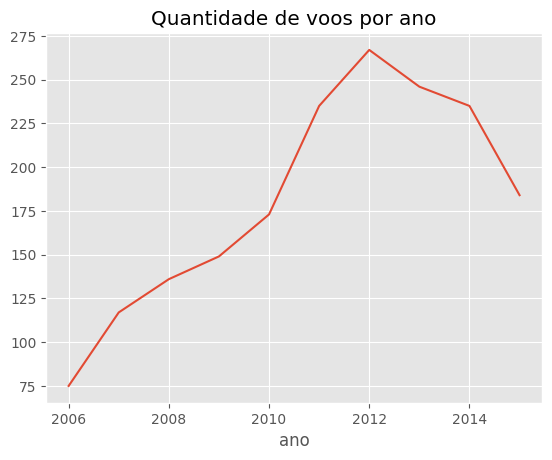

In [107]:
# Numero de voos por ano
df_group_year = df.groupby('ano')['quantidade_fatalidades']
df_group_year.count().plot().set_title("Quantidade de voos por ano")

Text(0.5, 1.0, 'Quantidade de fatalidades por ano')

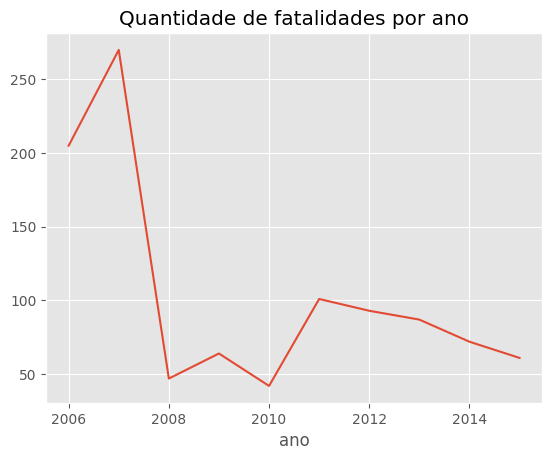

In [108]:
# Numero de fatalidades por ano
df_group_year.sum().plot().set_title("Quantidade de fatalidades por ano")

Text(0.5, 1.0, 'Quantidade de fatalidades x quantidade de ocorrências')

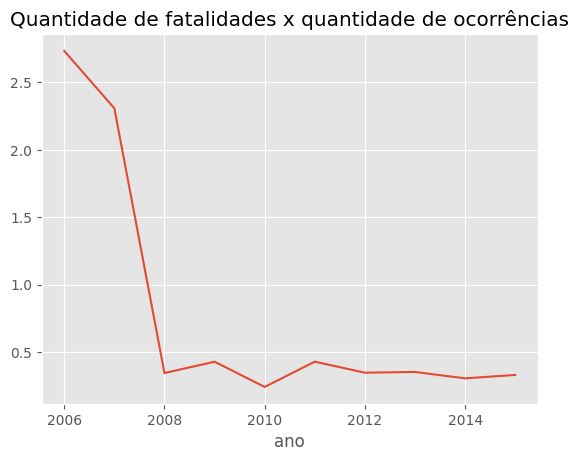

In [110]:
# Ratio de morte por quantidade de fatalidade por ano
df_fatality_ratio_year = df_group_year.sum() / df_group_year.count()
df_fatality_ratio_year.plot().set_title("Quantidade de fatalidades x quantidade de ocorrências")

Podemos observar que a partir de 2008 o número de fatalidades diminuíram e o número de ocorrências aumentaram. 

Com isso podemos concluir que ao passar dos anos os voos ficaram mais seguros, mesmo com um aumento de ocorrências o número de fatalidades diminuíram drasticamente.

Com os dados disponíveis não podemos afirmar, mas uma suposição é que esse aumento das ocorrências esteja relacionado a um aumento da quantidade de voos em geral e a evolução da tecnologia.

### Relação de tempo de uso das aeronaves e fatalidades

In [102]:
df_group_time_used = df[df['ano_fabricacao'] > 0].groupby('ano_fabricacao')['quantidade_fatalidades']

<Axes: xlabel='ano_fabricacao'>

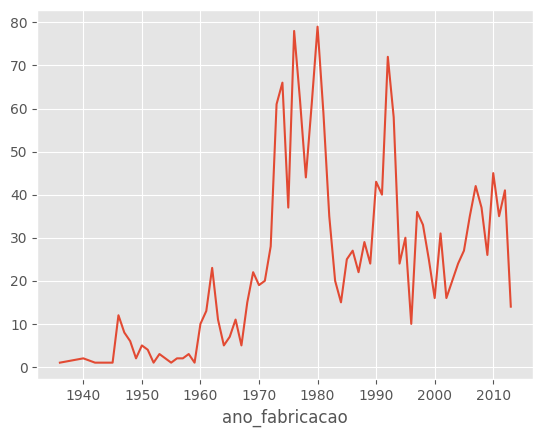

In [103]:
# Numero de voos por ano de fabricacao da aeronave
df_group_time_used.count().plot()

<Axes: xlabel='ano_fabricacao'>

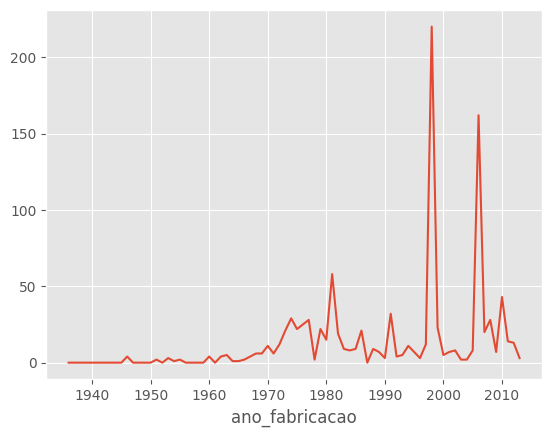

In [106]:
# Numero de fatalidades por ano de fabricação da aeronave
df_group_time_used.sum().plot()

<Axes: xlabel='ano_fabricacao'>

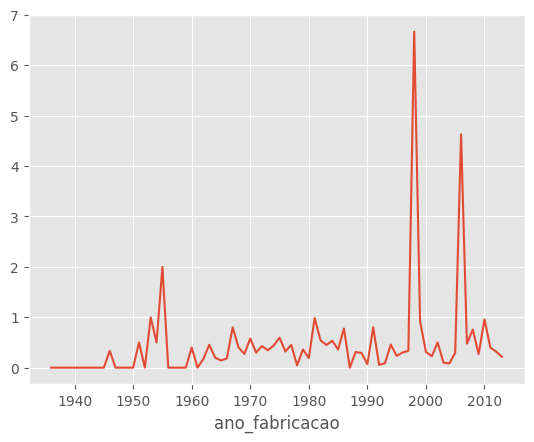

In [105]:
# Relação de fatalidade entre quantidade de fatalidade por tempo de uso
df_fatality_ratio_time_used = df_group_time_used.sum() / df_group_time_used.count()
df_fatality_ratio_time_used.plot()

Aeronaves fabricadas a partir de 1990 possuem uma maior taxa de fatalidade

### Relação motores e fatalidades

#### Aviões monomotores são mais perigosos?

In [65]:
df_group_engine = df.groupby('quantidade_motores')['quantidade_fatalidades']

Text(0.5, 1.0, 'Quantidade de ocorrências por número de motores')

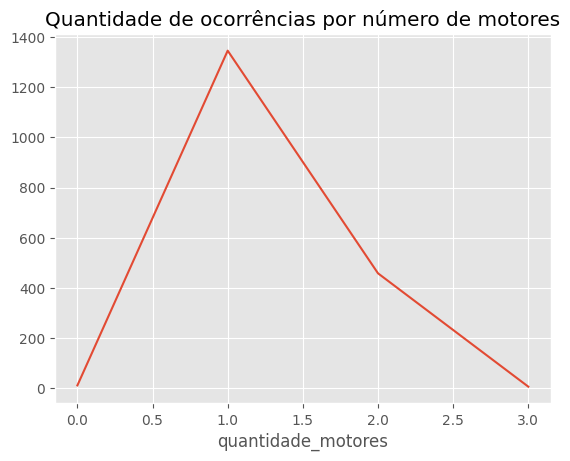

In [111]:
df_group_engine.count().plot().set_title("Quantidade de ocorrências por número de motores")

Text(0.5, 1.0, 'Quantidade de fatalidades por número de motores')

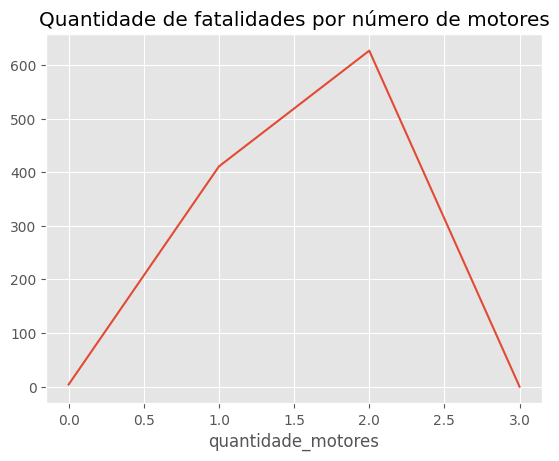

In [112]:
df_group_engine.sum().plot().set_title("Quantidade de fatalidades por número de motores")

Text(0.5, 1.0, 'Quantidade de fatalidades x quantidade de ocorrências por número de motores')

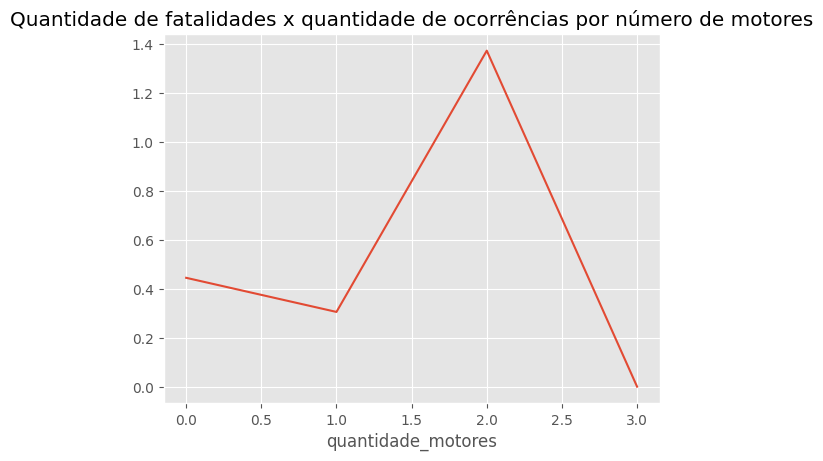

In [113]:
# Ratio de fatalidade entre quantidade de fatalidade por quantidade de motor
df_fatality_ratio_engine = df_group_engine.sum() / df_group_engine.count()
df_fatality_ratio_engine.plot().set_title("Quantidade de fatalidades x quantidade de ocorrências por número de motores")

In [69]:
df.groupby('quantidade_motores')['quantidade_assentos'].mean()

quantidade_motores
0.0      2.000000
1.0      3.244989
2.0     23.196937
3.0    120.500000
Name: quantidade_assentos, dtype: float64

Text(0.5, 1.0, 'Relação de fatalidades/ocorrências pela média de assentos')

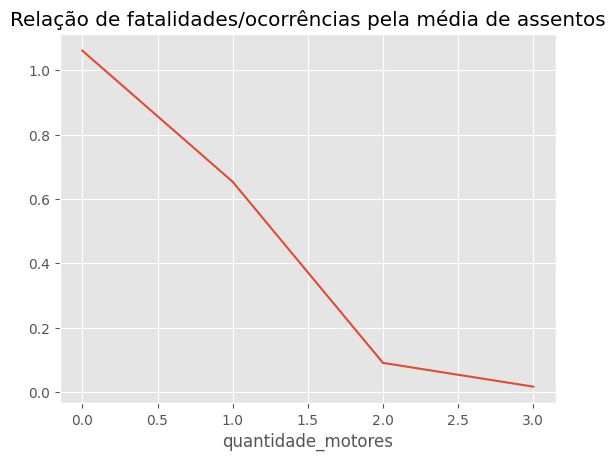

In [115]:
# Ratio de morte por media de assentos
df_fatality_ratio_seat = df_fatality_ratio_engine.sum() / df.groupby('quantidade_motores')['quantidade_assentos'].mean()
df_fatality_ratio_seat.plot().set_title("Relação de fatalidades/ocorrências pela média de assentos")

Aviões monomotores tem uma quantidade maior de ocorrências, mas o maior número de fatalidades está nas aeronaves com 2 motores. 

Porém os aviões de 2 motores possuem um número maior de assentos, quando fazemos a relação de fatalidades/ocorrências pela média de quantidade de assentos por quantidade de motores, podemos concluir que aviões sem motores e monomotores são os mais fatais

#### Tipo de motor mais perigoso

In [72]:
df_group_type_engine = df.groupby('tipo_motor')['quantidade_fatalidades']

Text(0.5, 1.0, 'Quantidade de ocorrências por tipo de motor')

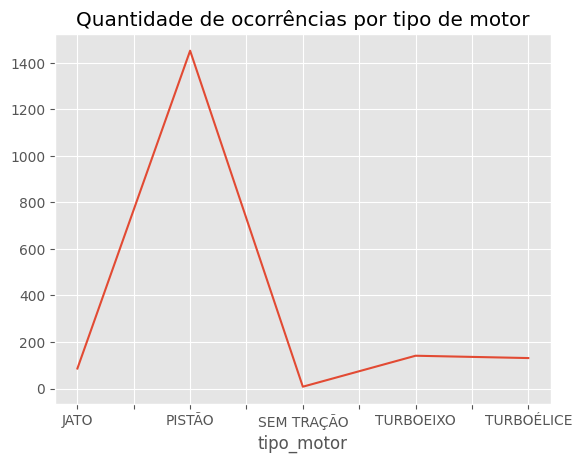

In [116]:
# Quantidade de ocorrência por tipo de motor
df_group_type_engine.count().plot().set_title("Quantidade de ocorrências por tipo de motor")

<Axes: xlabel='tipo_motor'>

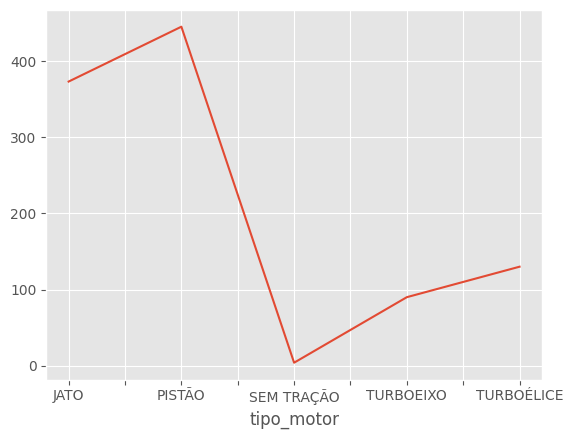

In [74]:
# Somatoria de fatalidades por tipo de motor
df_group_type_engine.sum().plot()

Text(0.5, 1.0, 'Quantidade de fatalidades/quantidade de ocorrências por tipo de motore')

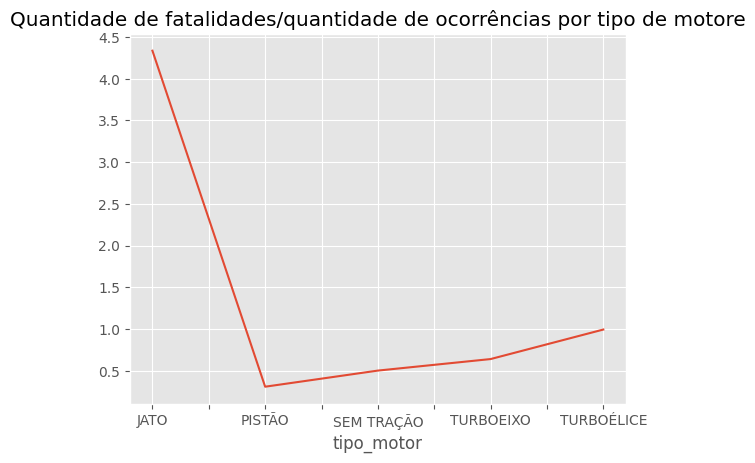

In [117]:
# Ratio de morte por tipo de motor
df_fatality_ratio_type = df_group_type_engine.sum() / df_group_type_engine.count()
df_fatality_ratio_type.plot().set_title("Quantidade de fatalidades/quantidade de ocorrências por tipo de motor")

In [76]:
df.groupby('tipo_motor')['quantidade_assentos'].mean()

tipo_motor
JATO          84.395349
PISTÃO         3.503790
SEM TRAÇÃO     1.500000
TURBOEIXO      7.758865
TURBOÉLICE    15.450382
Name: quantidade_assentos, dtype: float64

Text(0.5, 1.0, 'Relação de fatalidades/ocorrências pela média de assentos')

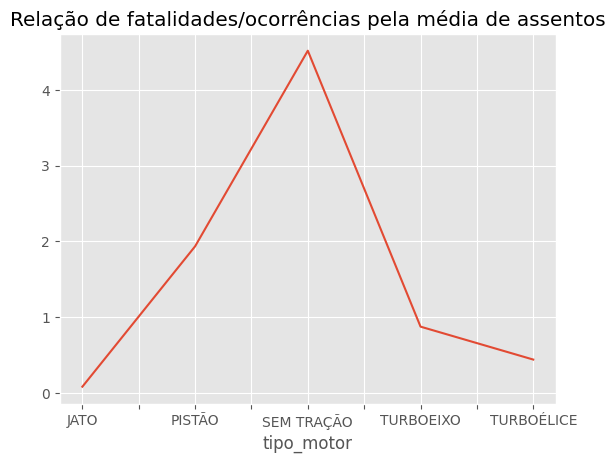

In [118]:
# Ratio de fatalidades por media de assentos
df_fatality_ratio_type_seat = df_fatality_ratio_type.sum() / df.groupby('tipo_motor')['quantidade_assentos'].mean()
df_fatality_ratio_type_seat.plot().set_title("Relação de fatalidades/ocorrências pela média de assentos")

Aviões com motor do tipo pistão tem o maior número de ocorrências, porém quando análisamos o relação de quantidade de fatalidades por número de ocorrências, motores do tipo jato é o mais letal. O principal motivo é a quantidade de assentos por aeronave, o jato tem uma média de 81 assentos enquanto o pistão tem uma média de 3.

Quando análisamos o a relação de fatalidade/ocorrência por tipo de motor dividida pela quantidade de assentos, motores sem tração são os mais letais

### Qual equipamento aéreo possui mais fatalidades

In [78]:
df_group_type_equipment = df.groupby('equipamento')['quantidade_fatalidades']

Text(0.5, 1.0, 'Quantidade de ocorrências por tipo de aeronave')

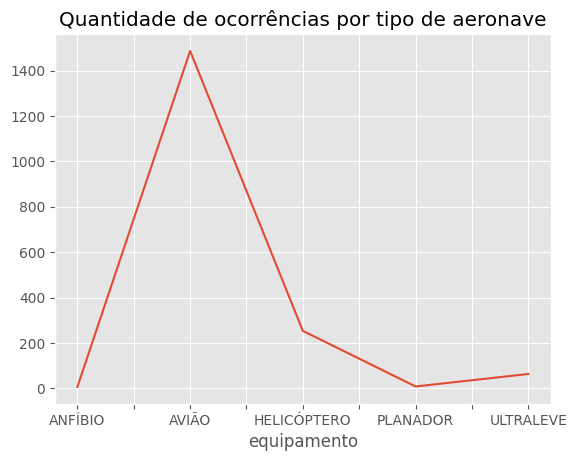

In [119]:
df_group_type_equipment.count().plot().set_title("Quantidade de ocorrências por tipo de aeronave")

<Axes: xlabel='equipamento'>

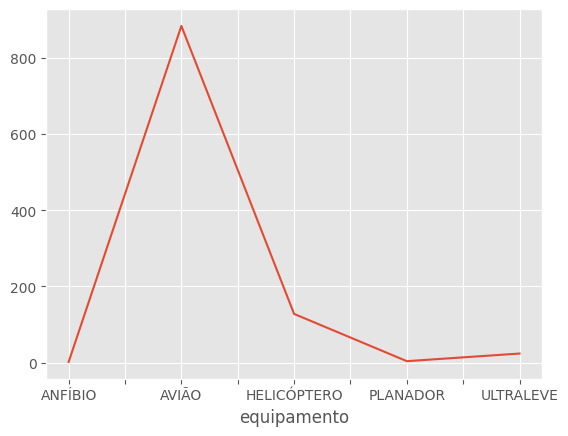

In [80]:
df_group_type_equipment.sum().plot()

Text(0.5, 1.0, 'Quantidade de fatalidades/quantidade de ocorrências por aeronave')

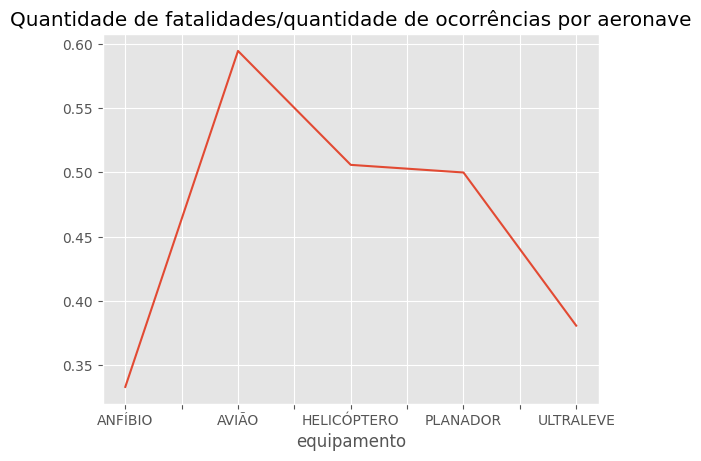

In [120]:
# Ratio de morte por tipo de motor
df_fatality_ratio_type_equipment = df_group_type_equipment.sum() / df_group_type_equipment.count()
df_fatality_ratio_type_equipment.plot().set_title("Quantidade de fatalidades/quantidade de ocorrências por aeronave")

Text(0.5, 1.0, 'Relação de fatalidades/ocorrências pela média de assentos')

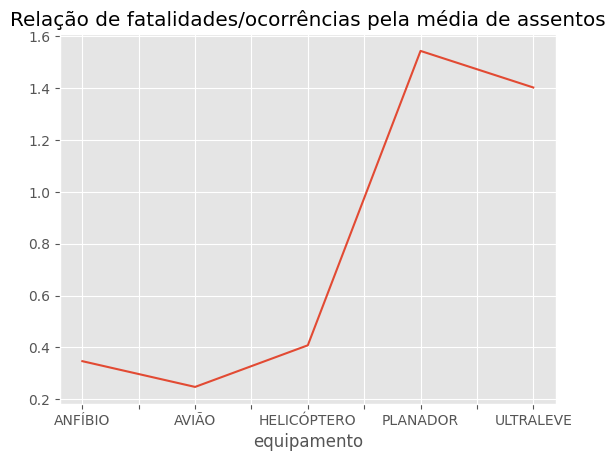

In [121]:
# Ratio de morte por media de assentos
df_fatality_ratio_type_equipment_seat = df_fatality_ratio_type_equipment.sum() / df.groupby('equipamento')['quantidade_assentos'].mean()
df_fatality_ratio_type_equipment_seat.plot().set_title("Relação de fatalidades/ocorrências pela média de assentos")

Aviões possuem o maior número de ocorrências e fatalidades, mesmo quando análisamos o relação de quantidade de fatalidades por número de ocorrências.

Quando análisamos o a relação de fatalidade/ocorrência por tipo de equipamento dividida pela quantidade de assentos, planadores e ultraleves são os mais letais